# README
---

## For the reader

<h4> Note that the following boxes appear in this notebook: </h4>

<div class="alert alert-block alert-success"><b>Green boxes:</b> Comments about results. </div>

<div class="alert alert-block alert-warning"><b>Yellow boxes:</b> Notes and warnings. </div>

<div class="alert alert-block alert-danger"><b>Red boxes:</b> Places you need to alter the code if you want to run it for yourself. </div>

## Brief Overview

<ul>
    <li><a href="#importing-necessary-libraries">1. Importing Necessary Libraries</a></li>
    <li><a href="#data-import-and-preparation">2. Data Import and Preparation</a>
        <ul>
            <li>2.1 Import Data</li>
                <ul>
                <li>Option 1: Importing Data from SQL</a></li>
                <li>Option 2: Importing Data from CSV</a></li>
                </ul>
            <li>2.2 Setting and Checking Column Data Types</a>
                <ul>
                    <li>2.3.1 Assigning Data Types</a></li>
                    <li>2.3.2 Verifying Data Types</a></li>
                </ul>
            </li>
        </ul>
    </li>
    <li><a href="#exploratory-data-analysis">3. Exploratory Data Analysis (EDA)</a>
        <ul>
            <li><a href="#descriptive-statistics">3.1 Descriptive Statistics</a></li>
            <li><a href="#data-visualization">3.2 Data Visualization</a>
                <ul>
                    <li><a href="#about-number-of-rides">3.2.1 About Number of Rides</a>
                        <ul>
                            <li>A. Pie Chart: Number of Rides (Members vs Casuals)</a></li>
                            <li>B. Weekly Ride Distribution (Members vs Casuals)</a></li>
                            <li>C. Monthly Ride Distribution (Members vs Casuals)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-ride-duration">3.2.2 About Ride Duration</a>
                        <ul>
                            <li>A. Weekly Ride Duration (Members vs Casuals)</a></li>
                            <li>B. Monthly Ride Duration (Members vs Casuals)</a></li>
                        </ul>
                    </li>
                    <li><a href="#about-rideable-type">3.2.3 About Rideable Type</a>
                        <ul>
                            <li>A. Bar Chart: Rideable Type (Electric vs Classic Bikes)</a></li>
                            <li>B. Bar Charts: Rideable Types for Members vs Casuals</a></li>
                        </ul>
                    </li>
                </ul>
            </li>
        </ul>
    </li>
</ul>


# 1. Importing Necessary Libraries <a id="importing-necessary-libraries"></a>
---

**pip that need to be installed:**  
pip install jupyter lab  
pip install numpy  
pip install pandas  
pip install sqlalchemy  
pip install psycopg2-binary  
pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import os
from sqlalchemy import create_engine #to import data from sql
import matplotlib.pyplot as plt # graphs

# 2. Data Import and Preparation <a id="data-import-and-preparation"></a>
---

## 2.1 Import
---

### Option 1: Importing Data from SQL

<div class="alert alert-block alert-danger"><b>Important:</b> Change connection inputs to your database inputs. <br> Running the following code may take some minutes </div>

import pandas as pd
from sqlalchemy import create_engine
#--------------change this part ------------------
# Database Inputs
db_name = 'divvy-tripdata'
db_user = 'postgres'
db_password = 'postgres'
db_host = 'localhost'
db_port = '5432'
#-------------------------------------------------
# Create an engine
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')
query = '''SELECT
    ride_id, 
    rideable_type,
    started_at,
    ended_at,
    start_lat,
    start_lng,
    end_lat,
    end_lng,
    member_casual,
    ride_duration,
    day_of_the_week,
    month
FROM bike_data'''
# Create Dataframe:
df = pd.read_sql(query, engine)
# Print Dataframe:
print(df)

#create a csv file for imported data from SQL
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
path=os.path.join(folder, file)
df.to_csv(path, index=False)
print("CSV divvy-tripdata_2023.csv, created")

### Option 2: Importing Data from CSV

<div class="alert alert-block alert-danger"><b>Important:</b> Change folder,file to you path and csv file name </div>

In [2]:
#--------------change this part ------------------
folder = r'C:\0.Sync\Coding\Data\Projects\CyclisticBike-Share'
file = 'divvy-tripdata_2023.csv'
#-------------------------------------------------
path=os.path.join(folder, file)
df= pd.read_csv(path)
print(df)

                  ride_id  rideable_type           started_at  \
0        C4E20E743EEBE781   classic_bike  2023-08-02 19:05:40   
1        AB17A09B37BAD39A  electric_bike  2023-08-18 22:53:20   
2        0B17D56196D063EA  electric_bike  2023-08-19 07:56:18   
3        2A13287E5EC2CF69  electric_bike  2023-08-01 18:28:08   
4        1B7F1EB9737E7BBF  electric_bike  2023-08-01 17:24:05   
...                   ...            ...                  ...   
5719872  D0999A931724CACE  electric_bike  2023-04-15 13:11:52   
5719873  EFE86CD88CB1E5A2  electric_bike  2023-04-30 09:22:31   
5719874  438A83BF9F60BF50  electric_bike  2023-04-26 19:52:11   
5719875  C0317955023D29A7   classic_bike  2023-04-21 08:55:04   
5719876  C683EBE98B35F092  electric_bike  2023-08-21 18:48:13   

                    ended_at  start_lat  start_lng    end_lat    end_lng  \
0        2023-08-02 19:46:57  41.886976 -87.612813  41.922167 -87.638888   
1        2023-08-18 23:03:28  41.915845 -87.634696  41.900000 -87.6

## 2.2 Setting and Checking Column Data Types
---

### 2.2.1 Assigning Data Types

In [3]:
# Set data types:
df['ride_id'] = df['ride_id'].astype(str)  # 16 length, unique, hex

# Convert to categorical - will set them to have order
df['rideable_type'] = df['rideable_type'].astype('category')
#rideable_type_order=['classic_bike', 'electric_bike', 'docked_bike']
#df['rideable_type'] = pd.Categorical(df['rideable_type'], categories=rideable_type_order, ordered=True)

member_casual_order=['member','casual']
df['member_casual'] = pd.Categorical(df['member_casual'], categories=member_casual_order, ordered=True)

day_of_the_week_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=day_of_the_week_order, ordered=True)

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Convert to datetime
df['started_at'] = pd.to_datetime(df['started_at'])  
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Convert to float
df['start_lat'] = df['start_lat'].astype('float64')
df['start_lng'] = df['start_lng'].astype('float64')
df['end_lat'] = df['end_lat'].astype('float64')
df['end_lng'] = df['end_lng'].astype('float64')
df['ride_duration'] = df['ride_duration'].astype('float64')

### 2.2.2 Verifying Data Types

In [4]:
print(df.dtypes)

ride_id                    object
rideable_type            category
started_at         datetime64[ns]
ended_at           datetime64[ns]
start_lat                 float64
start_lng                 float64
end_lat                   float64
end_lng                   float64
member_casual            category
ride_duration             float64
day_of_the_week          category
month                    category
dtype: object


In [5]:
if_unique_ride_id=df['ride_id'].nunique()==df.shape[0]
print(f"All ride_id's are unique={if_unique_ride_id}")

All ride_id's are unique=True


In [6]:
columns_check=['rideable_type','member_casual','day_of_the_week','month']
for i in columns_check:
    print(f"{i} has {df[i].unique()} values\n and unique values {df[i].nunique()}\n")

rideable_type has ['classic_bike', 'electric_bike', 'docked_bike']
Categories (3, object): ['classic_bike', 'docked_bike', 'electric_bike'] values
 and unique values 3

member_casual has ['casual', 'member']
Categories (2, object): ['member' < 'casual'] values
 and unique values 2

day_of_the_week has ['Wed', 'Fri', 'Sat', 'Tue', 'Thu', 'Sun', 'Mon']
Categories (7, object): ['Mon' < 'Tue' < 'Wed' < 'Thu' < 'Fri' < 'Sat' < 'Sun'] values
 and unique values 7

month has ['Aug', 'Apr', 'May', 'Jun', 'Sep', ..., 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']
Length: 12
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec'] values
 and unique values 12



# 3. Exploratory Data Analysis (EDA)<a id="exploratory-data-analysis"></a>
---

## 3.1 Descriptive Statistics <a id="descriptive-statistics"></a>
---

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5719877 entries, 0 to 5719876
Data columns (total 12 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ride_id          object        
 1   rideable_type    category      
 2   started_at       datetime64[ns]
 3   ended_at         datetime64[ns]
 4   start_lat        float64       
 5   start_lng        float64       
 6   end_lat          float64       
 7   end_lng          float64       
 8   member_casual    category      
 9   ride_duration    float64       
 10  day_of_the_week  category      
 11  month            category      
dtypes: category(4), datetime64[ns](2), float64(5), object(1)
memory usage: 370.9+ MB


In [8]:
# column list based on dtype
category_columns = df.select_dtypes(include=['category']).columns.tolist()
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
object_columns = df.select_dtypes(include=['object']).columns.tolist()

#All Missing values
missing_values = df.isnull().sum()
#1. Categorical Data
categorical_summary = df[category_columns].describe()
#2. Datetime Data
datetime_summary=df[datetime_columns].describe()
#3. Numeric Data
float_summary=df[float_columns].describe().map(lambda x: f'{x:,.2f}')
#4. object -> ride_id (all are unique)
object_summary=df[object_columns].describe()

#all printouts
print("----Missing values----")
print(missing_values)
print("----------------Summary:Categorical Data----------------")
print(categorical_summary)
print("----------------Categorical value counts----------------")
for col in category_columns:
    print("\n",df[col].value_counts().sort_values())
print("----------------Summary:Datetime Data----------------")
print(datetime_summary)
print("----------------Summary:Numeric Data----------------")
print(float_summary)
print("----------------Summary:ride_id----------------")
print(object_summary)


----Missing values----
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_lat             0
start_lng             0
end_lat            6993
end_lng            6993
member_casual         0
ride_duration       272
day_of_the_week       0
month                 0
dtype: int64
----------------Summary:Categorical Data----------------
        rideable_type member_casual day_of_the_week    month
count         5719877       5719877         5719877  5719877
unique              3             2               7       12
top     electric_bike        member             Sat      Aug
freq          2945579       3660698          883566   771693
----------------Categorical value counts----------------

 rideable_type
docked_bike        78287
classic_bike     2696011
electric_bike    2945579
Name: count, dtype: int64

 member_casual
casual    2059179
member    3660698
Name: count, dtype: int64

 day_of_the_week
Mon    729404
Sun    744578
Tue    822978
We

## 3.2 Data Visualization <a id="data-visualization"></a>
---

#4095A5 #cyclistic_blue  
#F2FC67 #cylcistic_yellow #F2FC67 #golden

In [10]:
# Image - Plot save
# If you run the code with image_save=False, it doesn't save the images. If set to True then saves them on the directory of the running .ipynb file
image_save=False

### 3.2.1 About Number of Rides <a id="about-number-of-rides"></a>
---

#### A. Pie Chart: Number of Rides (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\3507967411.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()


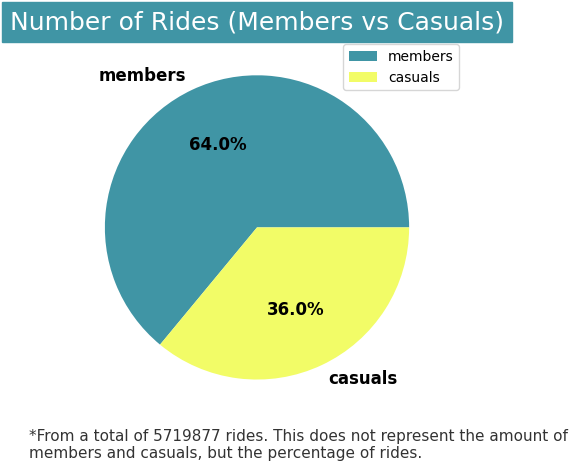

In [11]:
# Set the df for plot:
grouped_member_casual_size = df.groupby('member_casual', dropna=False).size()

# Calculate percentages for plot:
df_graph = round(grouped_member_casual_size / grouped_member_casual_size.sum()* 100, 2) 

# Change 'casual' to 'casuals' and 'member' to 'members' for better display:
df_graph.index = ['members' if x == 'member' else 'casuals' for x in df_graph.index]

# Preset for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_graph,
        colors=color,
        labels=df_graph.index,
        autopct='%1.1f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Number of Rides (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_graph.index,
           loc='upper right',bbox_to_anchor=(1.05, 1))
plt.text(-1.5, -1.5, f"*From a total of {df['member_casual'].shape[0]} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True,)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Pie_Number of Rides (Members vs Casuals).png', dpi=300)

plt.show()


#### B. Weekly Ride Distribution (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\4162122127.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()


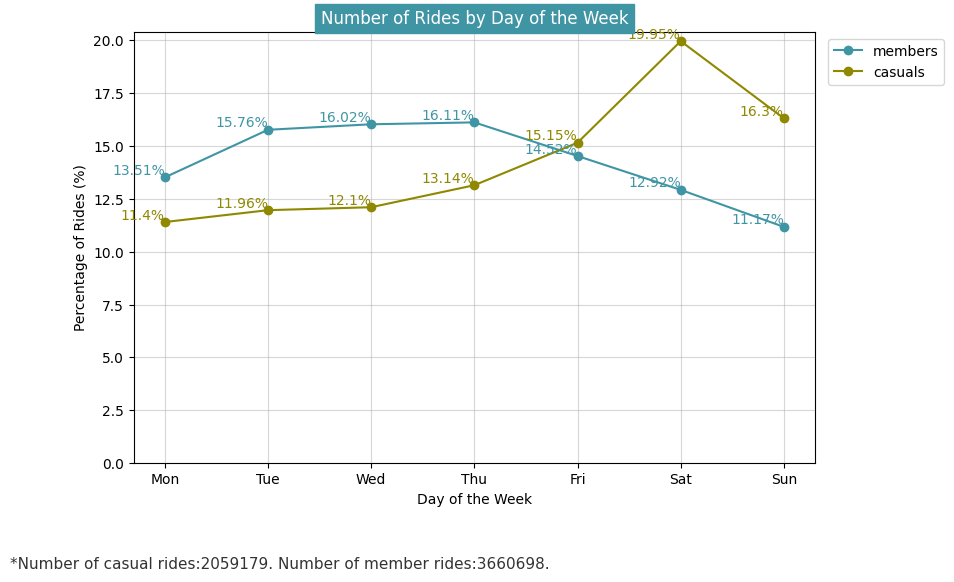

In [12]:
# Set the df for plot:
## Group the DataFrame by 'day_of_the_week' and calculate the size
grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()

## Line plot 1: Members
member_counts = grouped_day_of_the_week.loc['member']
## Calculate percentages for plot:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casuals
casual_counts = grouped_day_of_the_week.loc['casual']
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

## Plot:
plt.plot(grouped_day_of_the_week.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='members')
plt.plot(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='casuals')
# Annotate each point with its percentage value
for x, y in zip(grouped_day_of_the_week.loc['member'].index, member_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)
# Display: plot
plt.title("Weekly Ride Distribution (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Rides (%)')
plt.ylim(bottom=0)
plt.title('Number of Rides by Day of the Week')
plt.grid(True,alpha=0.5)
plt.legend(df_graph.index,
           loc='upper right',bbox_to_anchor=(1.2, 1))
plt.text(-1.5, -5, f"*Number of casual rides:{casual_counts.sum()}. Number of member rides:{member_counts.sum()}.",
         alpha=0.8,fontsize=11,ha='left', wrap=True)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Pie_Number of Rides (Members vs Casuals).png', dpi=300)

plt.show()


#### C. Monthly Ride Distribution (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\4162122127.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()


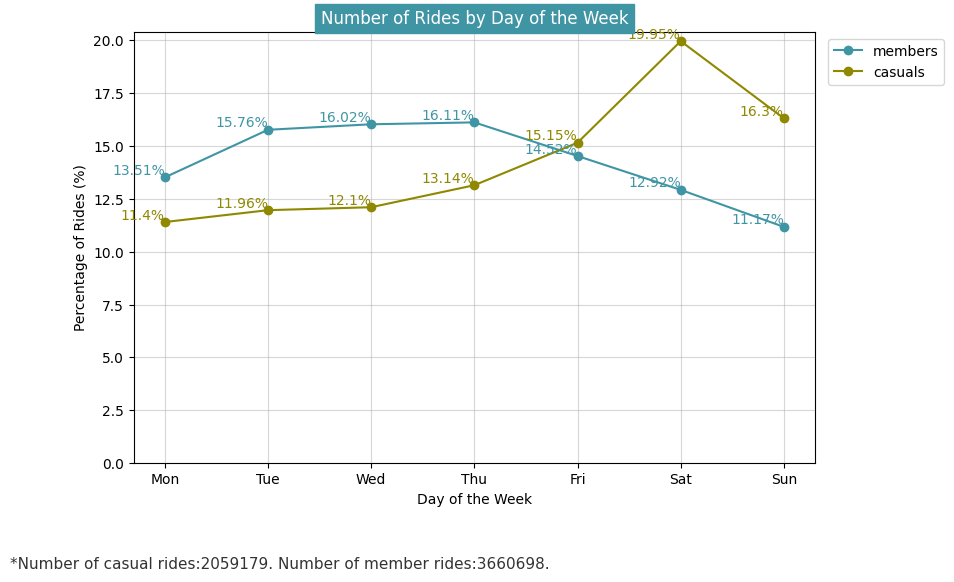

In [13]:
# Set the df for plot:
## Group the DataFrame by 'day_of_the_week' and calculate the size
grouped_day_of_the_week = df.groupby(['member_casual','day_of_the_week']).size()

## Line plot 1: Members
member_counts = grouped_day_of_the_week.loc['member']
## Calculate percentages for plot:
member_percentages = round(member_counts / member_counts.sum()*100, 2) 

## Line plot 2: Casuals
casual_counts = grouped_day_of_the_week.loc['casual']
casual_percentages = round(casual_counts / casual_counts.sum()* 100, 2) 

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

## Plot:
plt.plot(grouped_day_of_the_week.loc['member'].index, member_percentages.values, 
         color=color[0],marker='o',label='members')
plt.plot(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values,
         color=color[1],marker='o',label='casuals')
# Annotate each point with its percentage value
for x, y in zip(grouped_day_of_the_week.loc['member'].index, member_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(grouped_day_of_the_week.loc['casual'].index, casual_percentages.values):
    plt.text(x, y, f'{y}%', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)
# Display: plot
plt.title("Weekly Ride Distribution (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Rides (%)')
plt.ylim(bottom=0)
plt.title('Number of Rides by Day of the Week')
plt.grid(True,alpha=0.5)
plt.legend(df_graph.index,
           loc='upper right',bbox_to_anchor=(1.2, 1))
plt.text(-1.5, -5, f"*Number of casual rides:{casual_counts.sum()}. Number of member rides:{member_counts.sum()}.",
         alpha=0.8,fontsize=11,ha='left', wrap=True)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Pie_Number of Rides (Members vs Casuals).png', dpi=300)

plt.show()


### 3.2.2 About Ride Duration <a id="about-ride-duration"></a>
---

In [14]:
?.grouby().

Object `.grouby().` not found.


#### A. Weekly Ride Duration (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\3152893380.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()


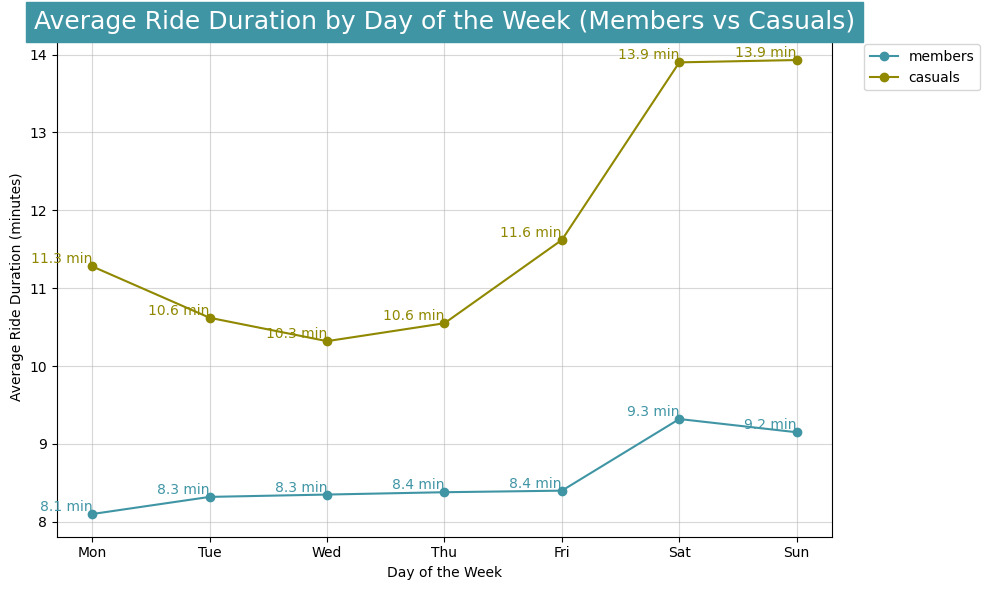

In [15]:
import numpy as np

# Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

# Group the DataFrame by 'day_of_the_week' and 'member_casual', and calculate the average ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].median()

# Separate the durations for members and casuals
member_durations = grouped_day_of_the_week_duration.loc['member']
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)

# Display plot
plt.title("Average Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Average_Ride_Duration_by_Day_of_the_Week.png', dpi=300)

plt.show()


C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\2596660415.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()


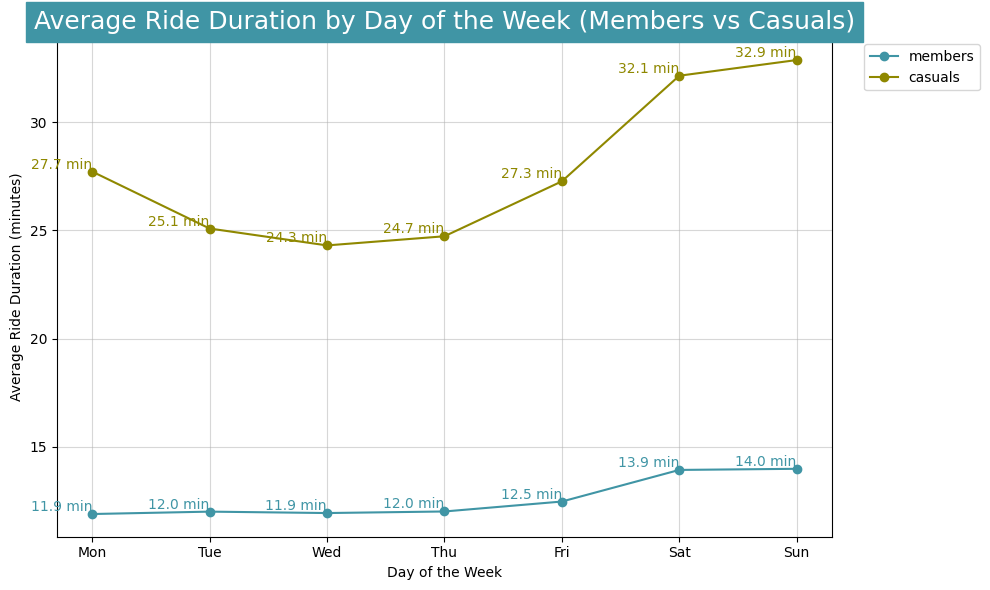

In [16]:
import numpy as np

# Filter out rows where ride_duration is not NA
df_filtered = df.dropna(subset=['ride_duration'])

# Group the DataFrame by 'day_of_the_week' and 'member_casual', and calculate the average ride duration
grouped_day_of_the_week_duration = df_filtered.groupby(['member_casual', 'day_of_the_week'])['ride_duration'].mean()

# Separate the durations for members and casuals
member_durations = grouped_day_of_the_week_duration.loc['member']
casual_durations = grouped_day_of_the_week_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)

# Display plot
plt.title("Average Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Duration (minutes)')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Average_Ride_Duration_by_Day_of_the_Week.png', dpi=300)

plt.show()


#### B. Monthly Ride Duration (Members vs Casuals)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\265153950.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()


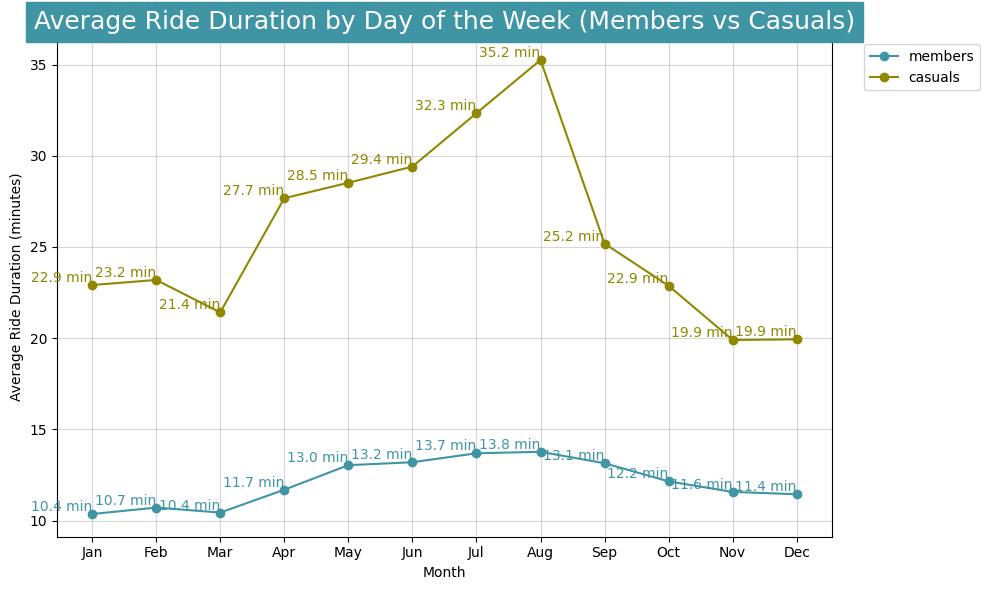

In [17]:
# Group the DataFrame by 'month' and 'member_casual', and calculate the average ride duration
grouped_month_duration = df.dropna(subset=['ride_duration']).groupby(['member_casual', 'month'])['ride_duration'].mean()

# Separate the durations for members and casuals
member_durations = grouped_month_duration.loc['member']
casual_durations = grouped_month_duration.loc['casual']

# Preset for plot:
color = ['#4095A5', '#8F8800']
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot:
plt.plot(member_durations.index, member_durations.values, 
         color=color[0], marker='o', label='members')
plt.plot(casual_durations.index, casual_durations.values,
         color=color[1], marker='o', label='casuals')

# Annotate each point with its average duration value
for x, y in zip(member_durations.index, member_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[0], rotation=0)

for x, y in zip(casual_durations.index, casual_durations.values):
    plt.text(x, y, f'{y:.1f} min', ha='right', va='bottom', fontsize=10, color=color[1], rotation=0)

# Display plot
plt.title("Average Ride Duration by Day of the Week (Members vs Casuals)",
          color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')
plt.xlabel('Month')
plt.ylabel('Average Ride Duration (minutes)')
plt.grid(True, alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()

# Save image if set to True
if image_save:
    plt.savefig('Average_Ride_Duration_by_month.png', dpi=300)

plt.show()


### 3.2.3 About Rideable Type <a id="about-rideable-type"></a>
---

#### A. Bar Chart: Rideable Type (Electric vs Classic Bikes)

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\27355660.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()


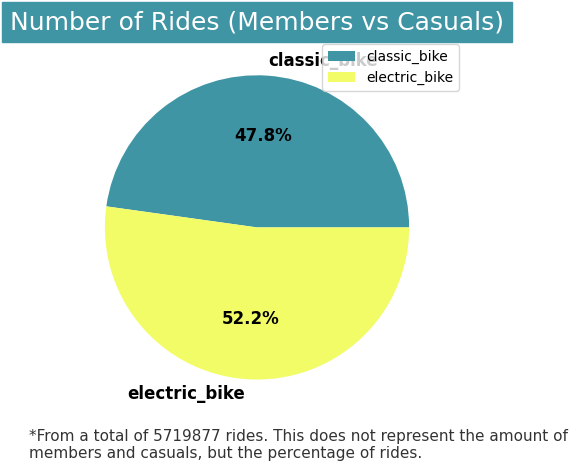

In [18]:
# Set the df for plot:
filtered_df=df[df['rideable_type']!='docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()
grouped_rideable_type_size = filtered_df.groupby('rideable_type', dropna=False).size()

# Calculate percentages for plot:
df_graph =grouped_rideable_type_size
df_graph = round(grouped_rideable_type_size / grouped_rideable_type_size.sum() * 100, 2)

# Preset for plot:
color = ['#4095A5', '#F2FC67']

# Plot
plt.pie(df_graph,
        colors=color,
        labels=df_graph.index,
        autopct='%1.1f%%',
        textprops={'weight': 'bold', 'size': 'large'})  # adjust textprops

# Display: plot
plt.title("Number of Rides (Members vs Casuals)",
          color='white',backgroundcolor='#4095A5',fontsize=18, ha='center')
plt.legend(df_graph.index,
           loc='upper right',bbox_to_anchor=(1.05, 1))
plt.text(-1.5, -1.5, f"*From a total of {df['rideable_type'].shape[0]} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         alpha=0.8,fontsize=11,ha='left', wrap=True,)
plt.tight_layout()
# Save image if set to True
if image_save==True:
    plt.savefig('Pie_Number of Rides (Members vs Casuals).png', dpi=300)

plt.show()


#### B. Bar Charts: Rideable Types for Members vs Casuals

In [72]:
grouped_rideable_type_size.sum()

5641590

In [79]:
df_graph_casual

rideable_type
classic_bike     44.27
electric_bike    55.73
dtype: float64

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\1482787540.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


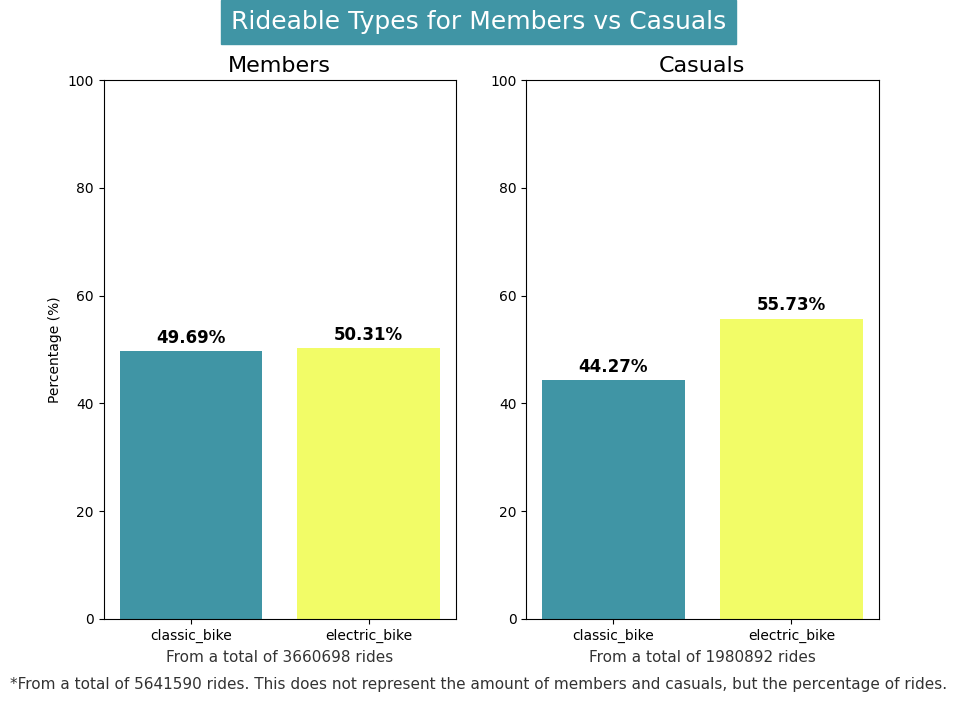

In [92]:
import matplotlib.pyplot as plt

# Set the df for plot:
filtered_df = df[df['rideable_type'] != 'docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()

# Group by 'member_casual' and 'rideable_type' and calculate sizes
grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()

# Calculate percentages for plots:
# Plot 1: Rideable_type percentages for members
df_graph_member = grouped_rideable_type_size['member']
df_graph_member = round(df_graph_member / df_graph_member.sum() * 100, 2)

# Plot 2: Rideable_type percentages for casuals
df_graph_casual = grouped_rideable_type_size['casual']
df_graph_casual = round(df_graph_casual / df_graph_casual.sum() * 100, 2)

# Preset for plot:
colors = ['#4095A5', '#F2FC67']

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 7), sharex=True)

# Plot for members
bars1 = ax1.bar(df_graph_member.index, df_graph_member, color=colors)
ax1.set_title("Members", fontsize=16)
ax1.set_ylabel('Percentage (%)')
ax1.set_ylim(0, 100)
#ax1.set_xticks(range(len(df_graph_member.index)))
#ax1.set_xticklabels(df_graph_member.index, rotation=0)

## Add percentages on top of the bars
for bar in bars1:
    height = bar.get_height()
    ax1.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Plot for casuals
bars2 = ax2.bar(df_graph_casual.index, df_graph_casual, color=colors)
ax2.set_title("Casuals", fontsize=16)
#ax2.set_ylabel('Percentage (%)')
ax2.set_ylim(0, 100)
#ax2.set_xticks(range(len(df_graph_casual.index)))
#ax2.set_xticklabels(df_graph_casual.index, rotation=0)

## Add percentages on top of the bars
for bar in bars2:
    height = bar.get_height()
    ax2.annotate(f'{height}%', 
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12, weight='bold')

# Add a main title
fig.suptitle("Rideable Types for Members vs Casuals",
             color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')

# Add text below the plots
ax1.text(0.5, -8, f"From a total of {grouped_rideable_type_size['member'].sum()} rides",
         ha='center', fontsize=11, alpha=0.8, wrap=True)
ax2.text(0.5, -8, f"From a total of {grouped_rideable_type_size['casual'].sum()} rides",
         ha='center', fontsize=11, alpha=0.8, wrap=True)
fig.text(0.5, 0.01, f"*From a total of {grouped_rideable_type_size['member'].sum()+grouped_rideable_type_size['casual'].sum()} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         ha='center', fontsize=11, alpha=0.8, wrap=True)

# Save image if set to True
image_save = False  # Set to True if you want to save the image
if image_save:
    plt.savefig('Rideable Types for Members vs Casuals.png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()


In [81]:
grouped_rideable_type_size['member'].sum()

3660698

C:\Users\Jim\AppData\Local\Temp\ipykernel_2900\3545684486.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()


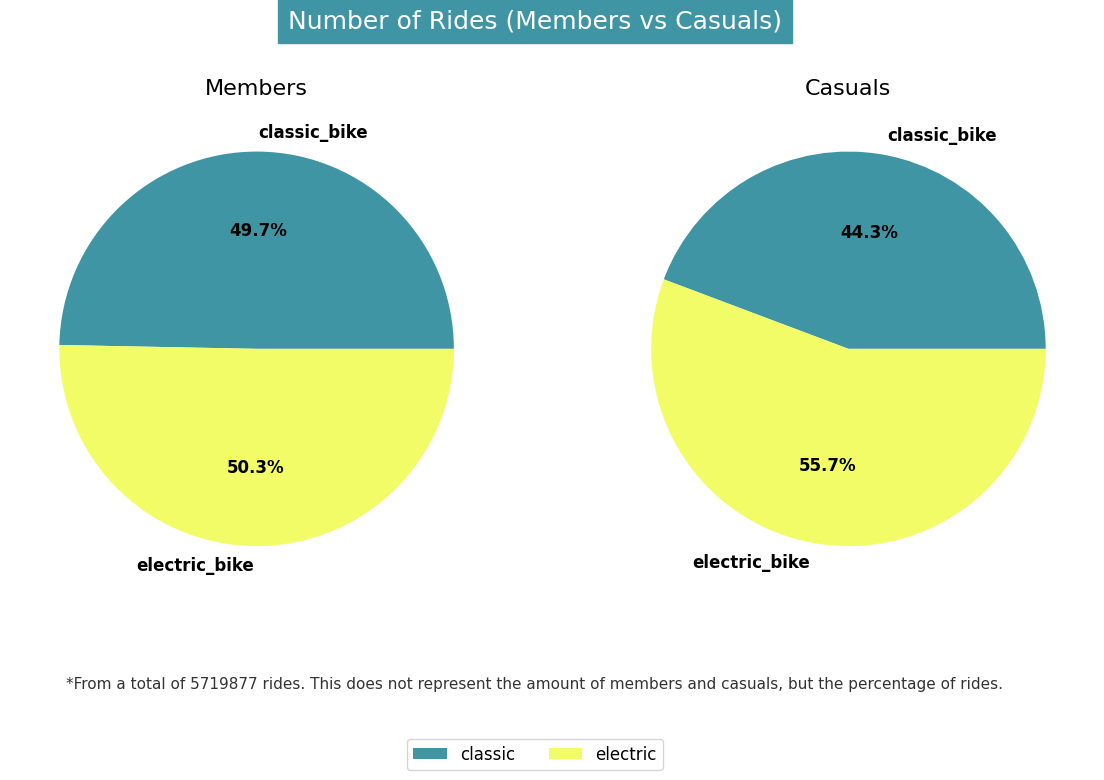

In [46]:
import matplotlib.pyplot as plt

# Set the df for plot:
filtered_df = df[df['rideable_type'] != 'docked_bike'].reset_index(drop=True)
filtered_df['rideable_type'] = filtered_df['rideable_type'].cat.remove_unused_categories()

# Group by 'member_casual' and 'rideable_type' and calculate sizes
grouped_rideable_type_size = filtered_df.groupby(['member_casual', 'rideable_type']).size()

# Calculate percentages for plots:
# Plot 1: Rideable_type percentages for members
df_graph_member = grouped_rideable_type_size['member']
df_graph_member = round(df_graph_member / df_graph_member.sum() * 100, 2)

# Plot 2: Rideable_type percentages for casuals
df_graph_casual = grouped_rideable_type_size['casual']
df_graph_casual = round(df_graph_casual / df_graph_casual.sum() * 100, 2)

# Preset for plot:
colors = ['#4095A5', '#F2FC67']
rideable_classic_electric = ['classic', 'electric']

# Plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), sharex=True)

# Plot for members
wedges1, texts1, autotexts1 = ax1.pie(df_graph_member,
                                      colors=colors,
                                      labels=df_graph_member.index,
                                      autopct='%1.1f%%',
                                      textprops={'weight': 'bold', 'size': 'large'})
ax1.set_title("Members", fontsize=16)

# Plot for casuals
wedges2, texts2, autotexts2 = ax2.pie(df_graph_casual,
                                      colors=colors,
                                      labels=df_graph_casual.index,
                                      autopct='%1.1f%%',
                                      textprops={'weight': 'bold', 'size': 'large'})
ax2.set_title("Casuals", fontsize=16)

# Add a main title
plt.suptitle("Number of Rides (Members vs Casuals)",
             color='white', backgroundcolor='#4095A5', fontsize=18, ha='center')

# Create a unifying legend
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, rideable_classic_electric, loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, fontsize=12)

# Add text below the plots
fig.text(0.5, 0.01, f"*From a total of {df['rideable_type'].shape[0]} rides. This does not represent the amount of members and casuals, but the percentage of rides.",
         ha='center', fontsize=11, alpha=0.8, wrap=True)

# Save image if set to True
image_save = False  # Set to True if you want to save the image
if image_save:
    plt.savefig('Pie_Number_of_Rides_Members_vs_Casuals.png', dpi=300, bbox_inches='tight')

# Display plot
plt.show()
